# Phys555 Assignment 2 Question 2
Karlee Zammit - V00823093

Q2 - Use  the Q1 regression data set for the following:
A) Use the linear regression model in the module 'Class04-Jan19.' Change the hyperparameters to get the best predictions. Explain the details and discuss the accuracy/performance of the model (i.e., associated plots and metrics). 
B) Do the same with KNN regression. What is the best K for your data? Which model (A or B) is more accurate (higher performance)?

# Introduction: Linear Regression and KNN

In [1]:
# Import the necessary packages
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
print('Done!')

Done!


# Functions

## Linear Regression Function

In [2]:
# Define a linear regression function
def linear_regression(max_iter, eta0, X_tr, X_va, Y_tr, Y_va, xlim, ylim, textx, texty, text2x, text2y, plot):
    reg = linear_model.SGDRegressor(loss='squared_error', penalty='L2', alpha=0.0001,
                                   max_iter=max_iter, eta0=eta0, tol=0.0001, learning_rate='adaptive', n_iter_no_change=3)

    # Fit the model on the PCA data
    reg.fit(X_tr,Y_tr)  # fit the model with training set

    #'predictions for training and validation sets'
    Y_tr_pred = reg.predict(X_tr)  
    Y_va_pred = reg.predict(X_va)

    #Statistical information regarding training and validation predictions
    mu = np.mean(Y_tr-Y_tr_pred)
    median = np.median(Y_tr-Y_tr_pred)
    sigma = np.std(Y_tr-Y_tr_pred)

    muv = np.mean(Y_va-Y_va_pred)
    medianv = np.median(Y_va-Y_va_pred)
    sigmav = np.std(Y_va-Y_va_pred)

    textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
    textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)
    
    if plot == 1:
        
        plt.figure(1)
        plt.plot(Y_tr,Y_tr_pred,'ob')
        plt.plot(Y_va,Y_va_pred,'.r')

        plt.plot(np.arange(xlim,ylim,.1),  np.arange(xlim,ylim,.1),'-k')
        plt.xlabel('X')
        plt.ylabel('Predicted X')
        plt.legend(['Training', 'Validation'], loc='best')
        # plt.xlim([0,2])
        # plt.ylim([0,2])

        plt.text(textx,texty,textstr, color='b',fontsize=15)
        plt.text(text2x,text2y,textstrv, color='r',fontsize=15)
        plt.title('Linear Regression')

        plt.figure(2)
        plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step',density=True,label='training')
        plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step',density=True,label='validation')
        plt.xlabel('Predicted - real')
        plt.ylabel('Probability (density)')
        plt.legend(loc='upper left')

        plt.figure(3)
        plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training',color='b',alpha=.3)
        plt.scatter(Y_va,Y_va_pred-Y_va,label='test',color='r',alpha=.3)
        plt.xlabel('Y (real)')
        plt.ylabel('Y (predicted) - Y (real)')
        plt.plot([xlim,ylim],[0,0],'y')
        plt.legend(loc='best')
    
    return mu, median, sigma, muv, medianv, sigmav

## KNN Function

In [3]:
def nearest_neighbour(nn, X_tr, X_va, Y_tr, Y_va, xlim, ylim, textx, texty, text2x, text2y, plot):    
    KNN = KNeighborsRegressor(n_neighbors=nn, weights='uniform')  # set the hyperparameters
    KNN.fit(X_tr,Y_tr)  # train it

    #'predictions for training and validation sets'
    Y_tr_pred= KNN.predict(X_tr)  
    Y_va_pred= KNN.predict(X_va)

    #Statistical information regarding training and validation predictions
    mu = np.mean(Y_tr-Y_tr_pred)
    median = np.median(Y_tr-Y_tr_pred)
    sigma = np.std(Y_tr-Y_tr_pred)

    muv = np.mean(Y_va-Y_va_pred)
    medianv = np.median(Y_va-Y_va_pred)
    sigmav = np.std(Y_va-Y_va_pred)

    textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
    textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)
    
    if plot == 1:
        
        plt.figure(1)
        plt.plot(Y_tr,Y_tr_pred,'ob')
        plt.plot(Y_va,Y_va_pred,'.r')

        plt.plot(np.arange(xlim,ylim,.1),  np.arange(xlim,ylim,.1),'-k')
        plt.xlabel('X')
        plt.ylabel('Predicted X')
        plt.legend(['Training', 'Validation'])
    
        plt.text(textx,texty,textstr, color='b',fontsize=15)
        plt.text(text2x,text2y,textstrv, color='r',fontsize=15)
        plt.title('KNN Regression: ' + str(nn) + ' NN')

        plt.figure(2)
        plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step',density=True,label='training')
        plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step',density=True,label='validation')
        plt.xlabel('Predicted - real')
        plt.ylabel('Probability (density)')
        plt.legend(loc='best')

        plt.figure(3)
        plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training',color='b',alpha=.3)
        plt.scatter(Y_va,Y_va_pred-Y_va,label='test',color='r',alpha=.3)
        plt.xlabel('Y (real)')
        plt.ylabel('Y (predicted) - Y (real)')
        plt.plot([xlim,ylim],[0,0],'y')
        plt.legend(loc='best')
    
    return mu, median, sigma, muv, medianv, sigmav
    

## Split and Normalize Data Function

In [4]:
def split_data(X,Y):
    # Split the input and target data into test and train, with 75% of the data going to training, and 25% of the data going to testing
    X_tr, X_va, Y_tr, Y_va = train_test_split(X,Y.values.ravel(),test_size=0.25)

    # Print the shape of the split data
    print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))
    
    # Normalize the data, as was done in Q2
    scaler_S= StandardScaler().fit(X_tr)  # line #2
    X_tr_Norm= scaler_S.transform(X_tr) # line # 3
    X_va_Norm= scaler_S.transform(X_va)  # Line #4
    
    n_column = 2

    # Plot a figure of the normalized training and validation set to ensure they represent the same distribution and spread
    
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(X_tr_Norm[:,n_column])
    plt.title('Training set')
    plt.ylabel('N')
    plt.xlabel("X"+str(n_column))

    plt.subplot(1, 2, 2)
    plt.hist(X_va_Norm[:,n_column])
    plt.title('Validation set')
    plt.ylabel('N')
    plt.xlabel("X"+str(n_column))
    
    return X_tr_Norm, X_va_Norm, Y_tr, Y_va

# Sachs Harbour: Linear Regression and KNN

Index(['10-100Hz', '100-1000Hz', '1-10kHz', '10-24kHz', '250Hz', '50-1000Hz',
       'DewPt', 'RelHum', 'WindDir', 'WindSp', 'Pressure', 'Ice6km2',
       'Ice19km2', 'Ice31km2', 'Ice106km2'],
      dtype='object')
Index(['Temperature'], dtype='object')
training set ==  (7231, 15) (7231,) ,, validation set ==  (2411, 15) (2411,)


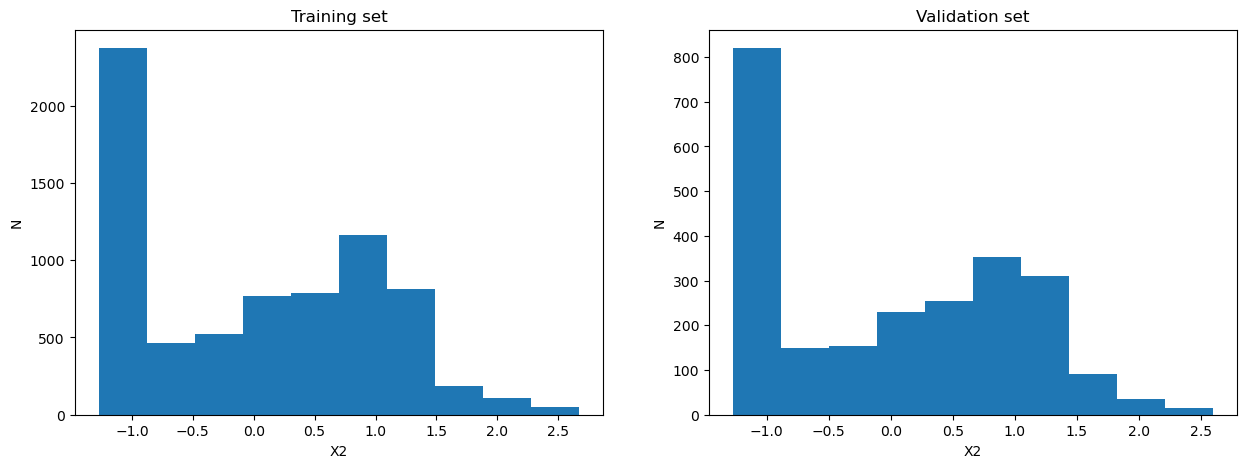

In [5]:
df_SH = pd.read_excel('Ambient Sound Data Sachs Harbour 2015-2016.xlsx')
df_SH = df_SH.drop(['Deployment', 'Year', 'Month', 'Day', 'Hour', 'DateTime', 'Ice'], axis=1)
df_SH=df_SH.dropna(axis=0)

# Set temperature as the target variable
var = ['Temperature']
#var = ['Ice106km2']

# Drop temperature out of the weather data, and set it as X
X = df_SH.loc[:,df_SH.columns.drop(var)]
print(X.columns)

# Set the target (Y) to be temperature
Y = df_SH[var].copy()
print(Y.columns)

X_tr_Norm, X_va_Norm, Y_tr, Y_va = split_data(X,Y)

## Linear Regression

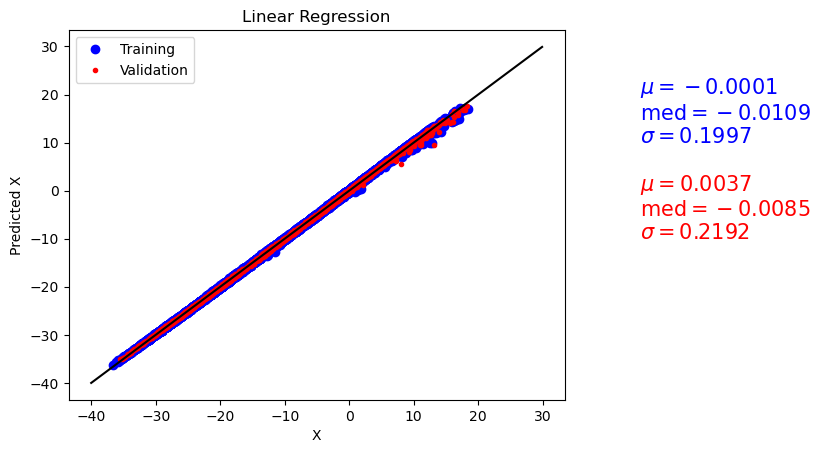

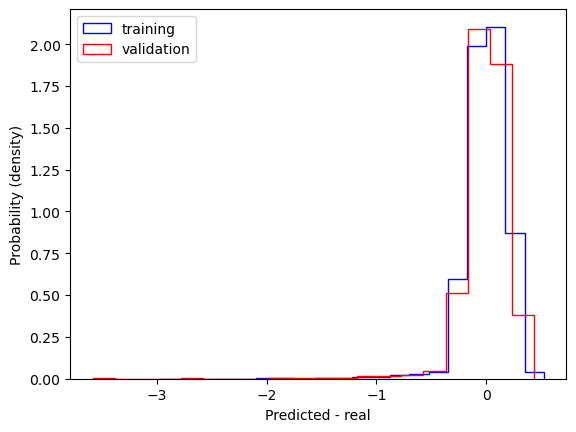

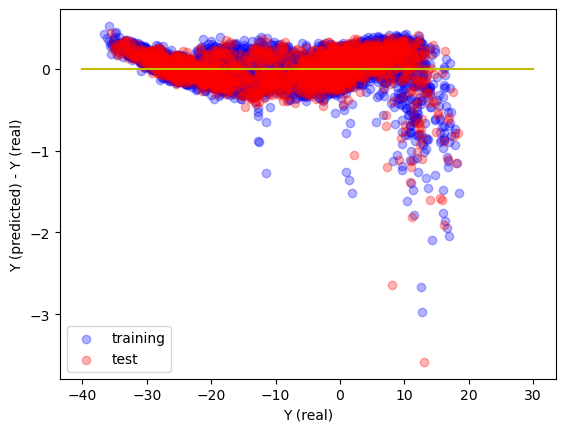

In [6]:
mu, median, sigma, muv, medianv, sigmav = linear_regression(2000, 0.001, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

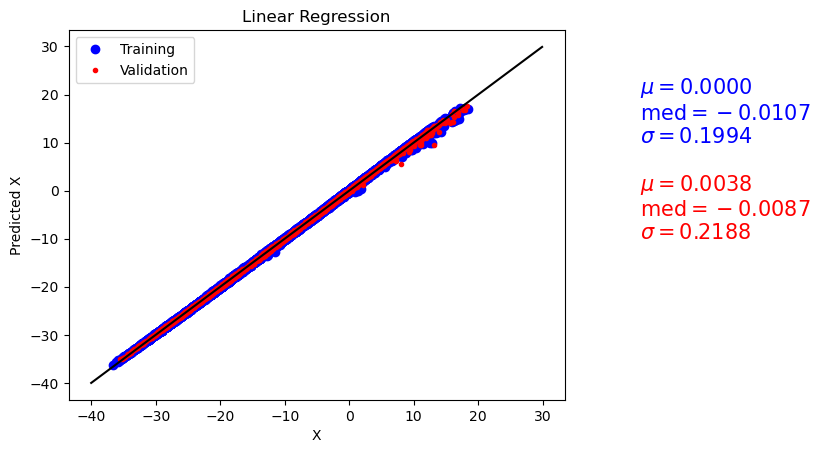

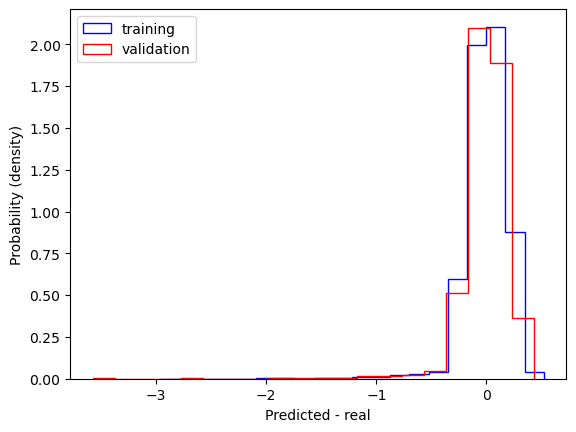

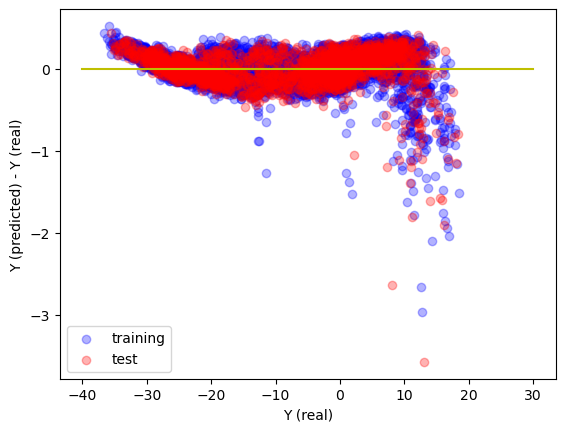

In [7]:
mu, median, sigma, muv, medianv, sigmav = linear_regression(40, 0.001, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

### Discussion: Linear Regression

I believe that max iteration of 40 and learning rate of 0.001, along with the other parameters I left as their default values, is nearest to the best choice for this dataset. Below 40 iterations, sometimes a warning would appear that the model never reached convergence and to set the maximum number of iterations to a higher value. This never happened for a maximum iteration of 40. The difference between the results for 40 iterations and 2000 iterations is small enough that I do not believe there is a benefit to setting it this high. I also set the learning rate to adaptive, meaning that 

"eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5"

as stated in the scikit learn documentation. 

Linear regression overall seems to not do a good job at modelling temperature based on the other variables in this dataset. If perfect, the distribution in the final plot above would be centered around 0, whereas for this dataset, we can see there are overpredicted values as well as underpredicted values based on this model. These results did not change as I varied the hyperparameters, meaning that this linear model may not be the best choice for this data. 

## KNN

Below I use KNN for a variety of different nearest-neighbour values and visually inspect the difference.

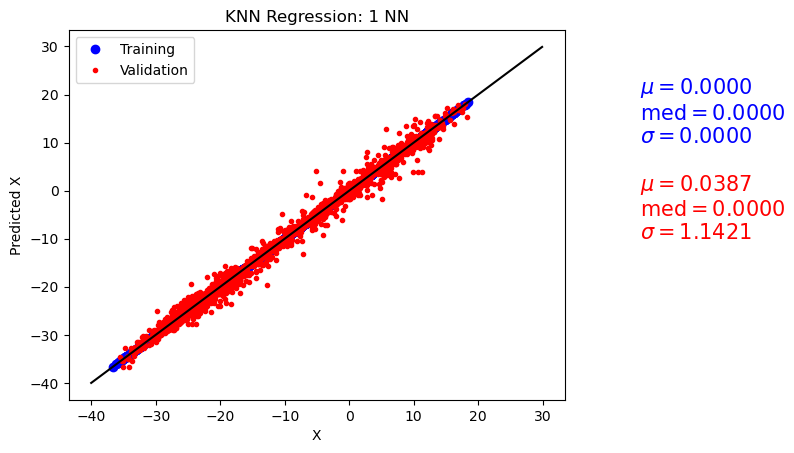

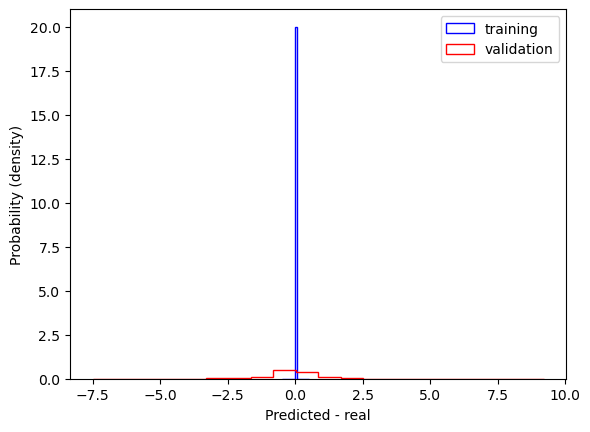

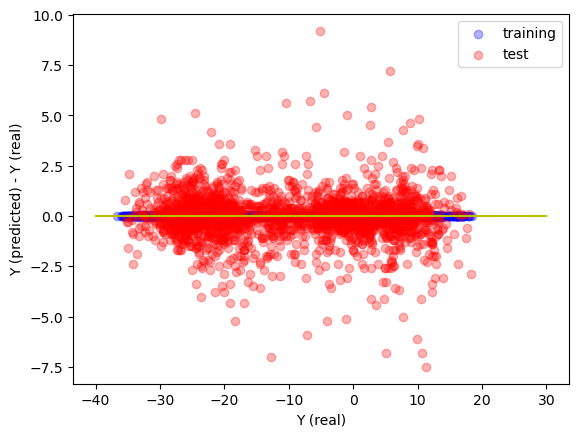

In [8]:
mu1, median1, sigma1, muv1, medianv1, sigmav1 = nearest_neighbour(1, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)
mu4, median4, sigma4, muv4, medianv4, sigmav4 = nearest_neighbour(4, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=0)

The above plots show that 1 nearest neighbour is not an acceptable choice. Because it uses only the training point closest to the query point, the bias of the 1-nearest neighbor estimate is often low, but the variance is high. The KNN model will depend highly on the subset of data points that I chose as training data. If I randomly reshuffle the data points I chose, the model will be dramatically different in each iteration. 

Below I test a variety of nearest neighbour values (greater than 1) to see which value might be nearest to optimal. 

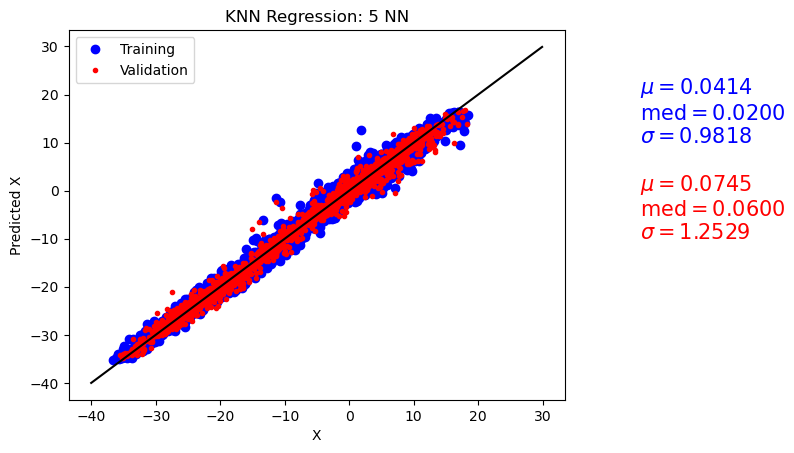

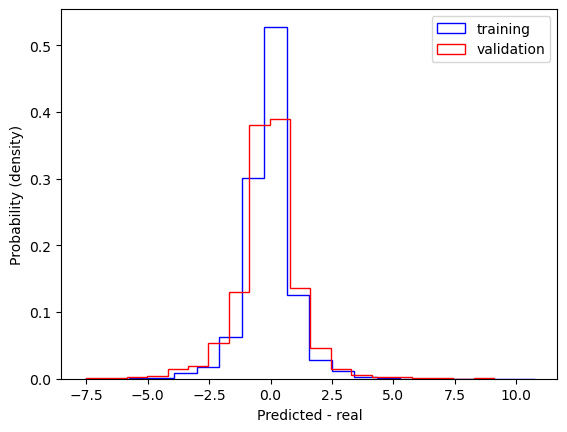

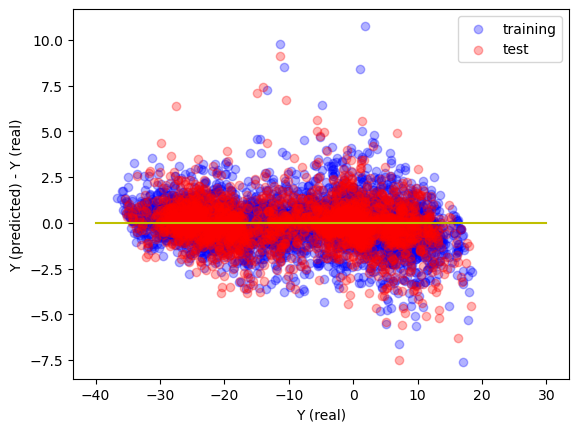

In [9]:
mu5, median5, sigma5, muv5, medianv5, sigmav5 = nearest_neighbour(5, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

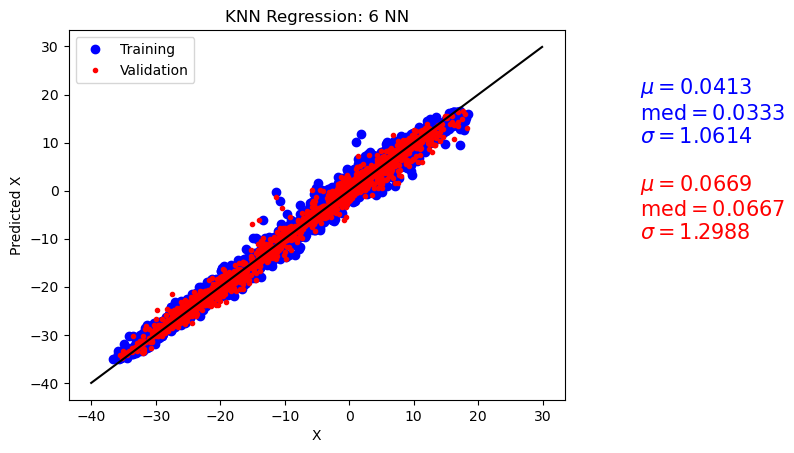

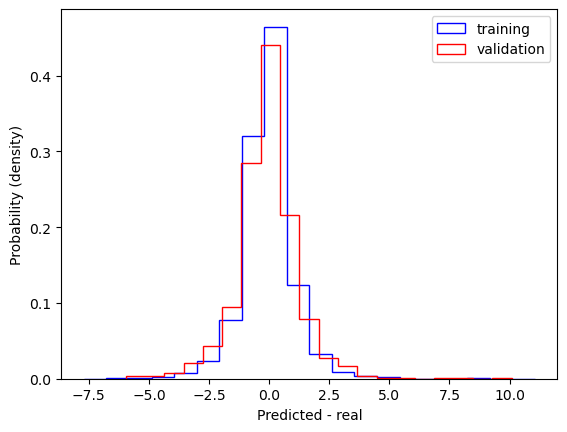

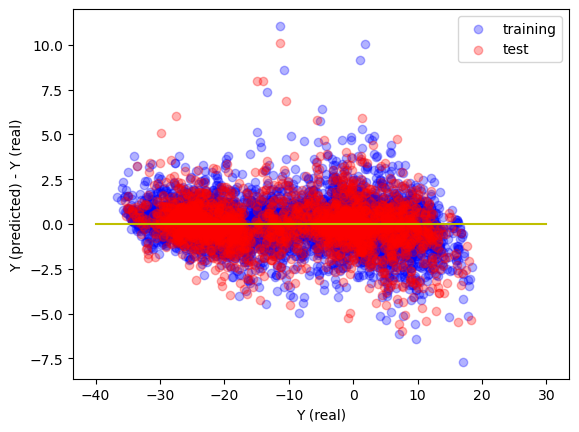

In [10]:
mu6, median6, sigma6, muv6, medianv6, sigmav6 = nearest_neighbour(6, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

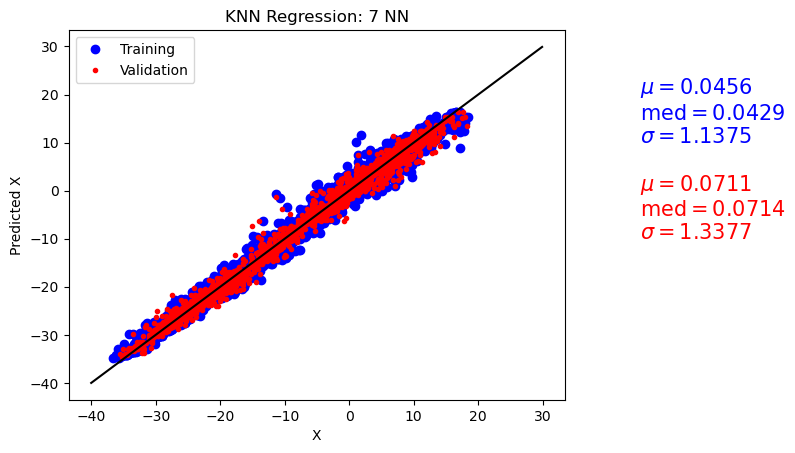

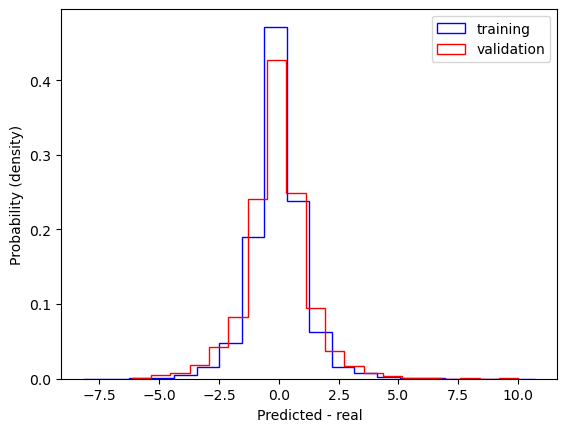

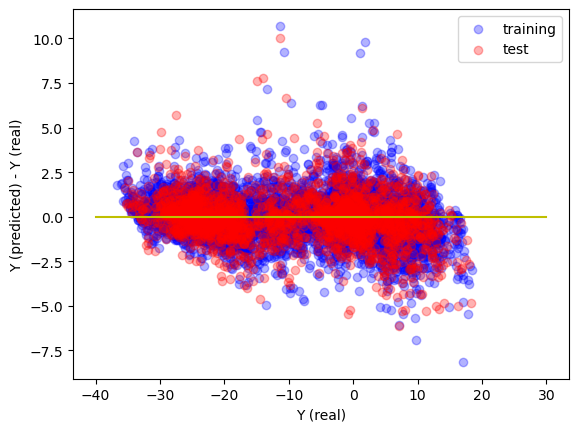

In [11]:
mu7, median7, sigma7, muv7, medianv7, sigmav7 = nearest_neighbour(7, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

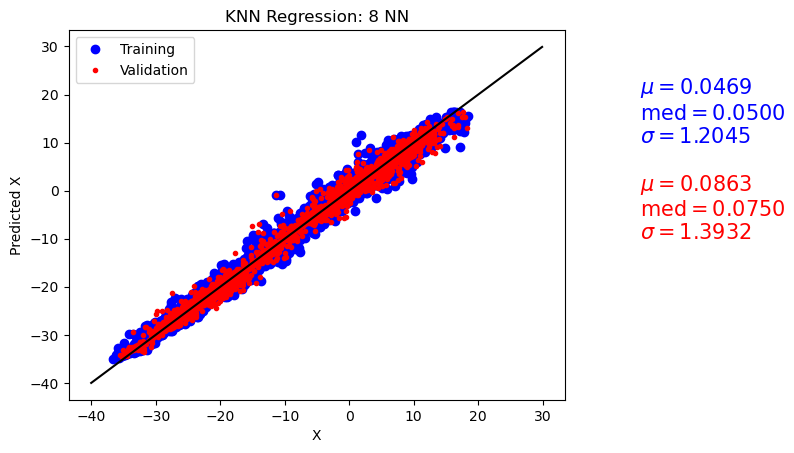

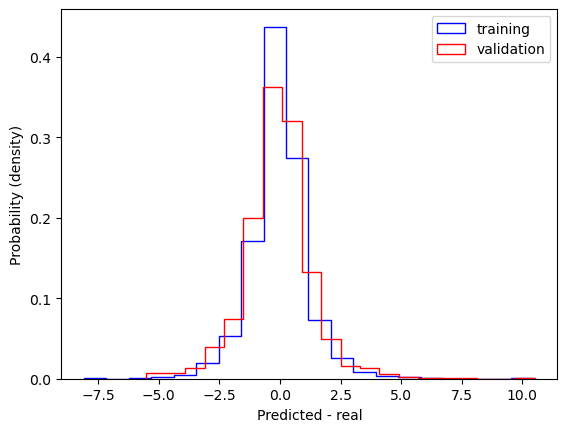

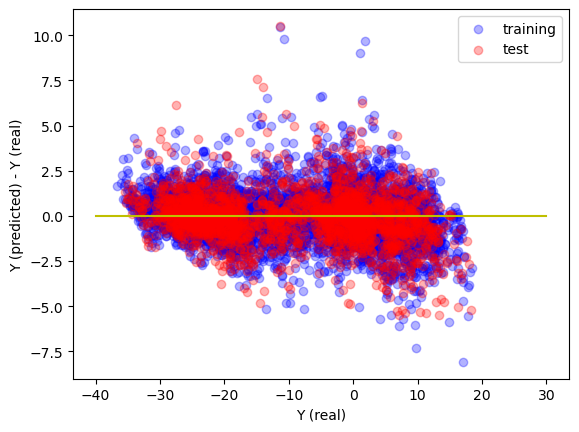

In [12]:
mu8, median8, sigma8, muv8, medianv8, sigmav8 = nearest_neighbour(8, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

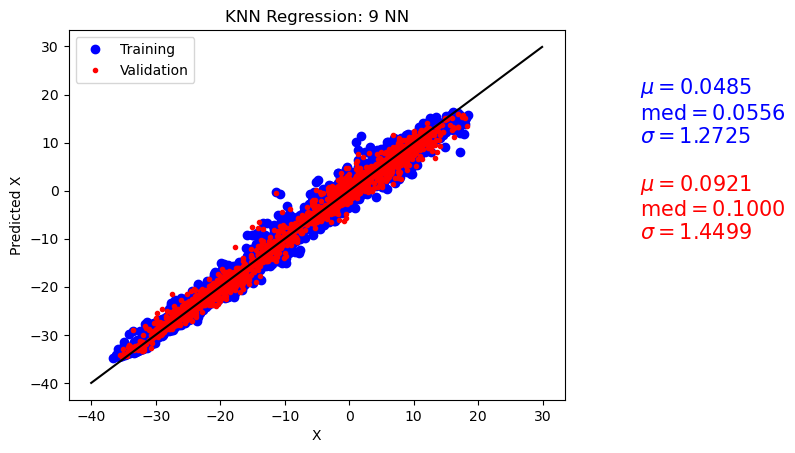

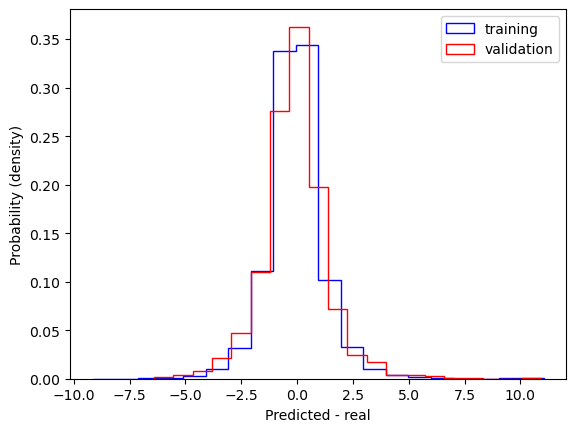

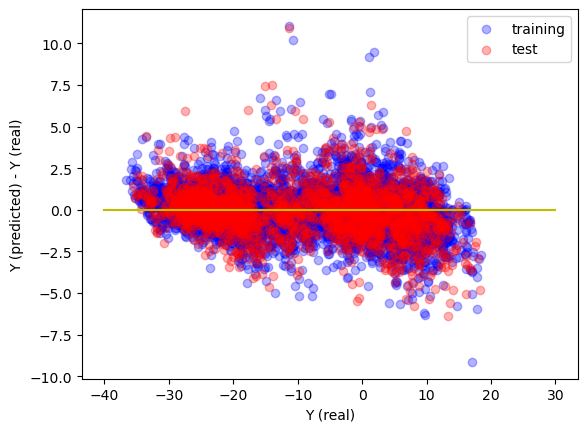

In [13]:
mu9, median9, sigma9, muv9, medianv9, sigmav9 = nearest_neighbour(9, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)
mu10, median10, sigma10, muv10, medianv10, sigmav10 = nearest_neighbour(10, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=0)

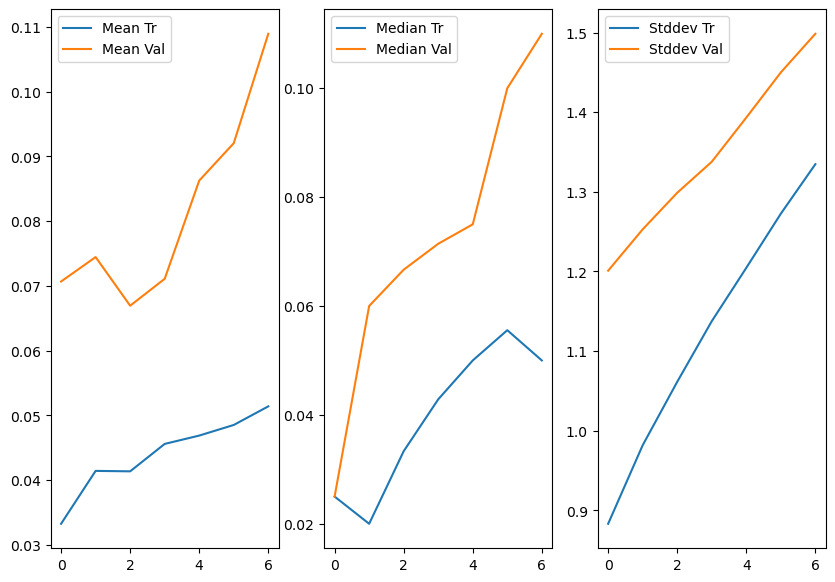

In [14]:


mu = [mu4, mu5, mu6, mu7, mu8, mu9, mu10]
muv = [muv4, muv5, muv6, muv7, muv8, muv9, muv10]
median = [median4, median5, median6, median7, median8, median9, median10]
medianv = [medianv4, medianv5, medianv6, medianv7, medianv8, medianv9, medianv10]
sigma = [sigma4, sigma5, sigma6, sigma7, sigma8, sigma9, sigma10]
sigmav = [sigmav4, sigmav5, sigmav6, sigmav7, sigmav8, sigmav9, sigmav10]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 7))
#fig.suptitle('Horizontally stacked subplots')
ax1.plot(mu, label='Mean Tr')
ax1.plot(muv, label='Mean Val')
ax1.legend(loc="best")
ax2.plot(median, label='Median Tr')
ax2.plot(medianv, label='Median Val')
ax2.legend(loc="best")
ax3.plot(sigma, label='Stddev Tr')
ax3.plot(sigmav, label='Stddev Val')
ax3.legend(loc="best")

#plt.plot(sigma)

### Discussion: KNN

From the above data, I believe that 7 nearest neighbours is an appropriate choice for this dataset. Below 7, the probability distributions plotted for the training and validation datasets were slightly different, and as I increased the number of nearest neighbours, the distributions became more similar. Above 7, I did not see a substantial difference in the results (any of the plots) to make me think including more neighbours would be beneficial. At 7 nearest neighbours, the median of the data was identical, and above this value the training and validation data split apart in the above plot, and so 7 seems to be an adequate choice.

# Discussion

For the Sachs Harbour dataset, linear regression and k-nearest neighbours algorithms were applied to the data to try to predict temperature based on the other variables (weather related, and ambient frequency levels). After trial and error of the models parameters and hyperparameters, the best models were determined to be as follows: 

Linear Regression: 
- 40 max iterations 
- Learning rate of 0.001 
- Adaptive learning rate
- Defaults otherwise 

KNN: 
- 7 Nearest Neighbours 
- Defaults otherwise 

Overall, KNN is a better choice to model this data as it does not appear that temperature is linearly related to the rest of the variables in the Sachs harbour dataset. KNN is able to more accurately model data for non-linear relationships, as displayed in the results above. Specifically, I like the Y(predicted)-Y(real) vs. Y(real) plots as it is very easy to visualize if data is over or underpredicted. Linear regression suffered in this regard, underpredicting both the training and validation data, where KNN suffered less in this regard. It was difficult to definitively say "7 NN is better than 6", but it was easy to say "7 NN is better than 1 NN", and so I can conclude large changes between hyperparameters is easier to detect than small ones, as you would expect.

Playing with the hyperparameters of these models is not a trivial task. An analyst must know what they are looking for, or looking to use the data to predict, before being able to tailor the results of these models to their liking to make the model fit their task. The default values are good for this assignment in most cases as this was for a general overview of these models, and I do not have a specific goal in mind (ie, comparing ice coverage to temperature specifically, etc). If I wanted to look at specific variables more in depth, I would return to these hyperparameters and model parameters to better fit the data. The point of this is that each time the data is altered, or a new goal is determined, these hyperparameters will need to be adjusted. 


# References

Bishop, C. M. (2006). Pattern recognition and machine learning. In Pattern recognition and machine learning. Springer.

**Sachs Harbour Dataset:** 

Insley, S. J., Halliday, W. D., & de Jong, T. (2017). Seasonal Patterns in Ocean Ambient Noise near Sachs Harbour, Northwest Territories. Arctic, 70(3), 239–248. https://doi.org/10.14430/arctic4662

**Scikit Learn Documentation:**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

**Appendix Datasets:**

https://www.kaggle.com/datasets/budincsevity/szeged-weather

http://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

# Appendix: Extra Datasets

## Szeged Weather

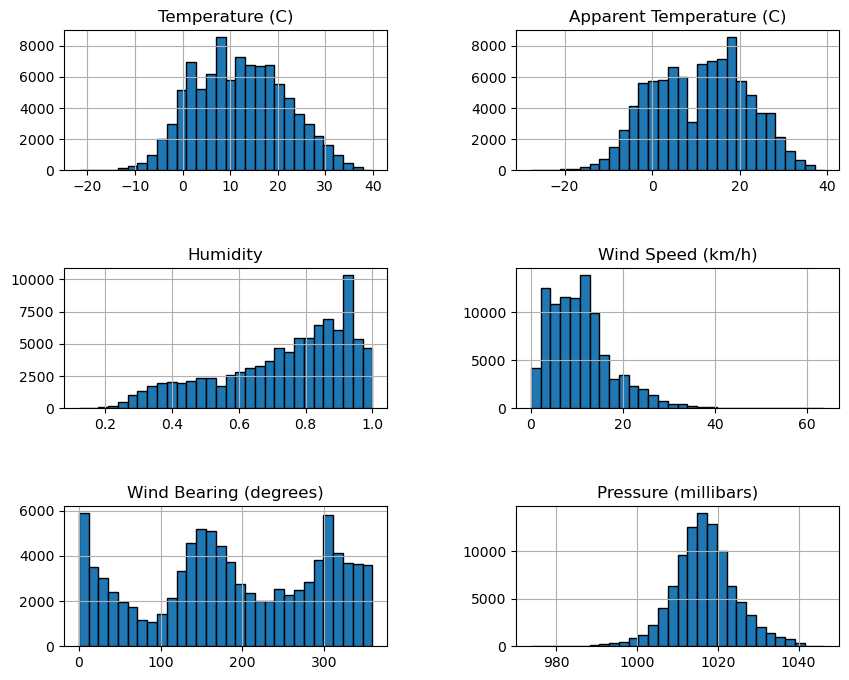

In [15]:
# Read in the csv data and perform the same data mining steps as was done in question 1
weather = pd.read_csv(r'weatherHistory.csv', delimiter=',')
weather=weather.dropna(axis=0)
weather = weather.drop(['Formatted Date', 'Summary', 'Daily Summary', 'Precip Type', 'Loud Cover', 'Visibility (km)'], axis=1)
weather_mined = weather.loc[ weather['Pressure (millibars)'] != 0]
weather_mined = weather_mined.loc[weather_mined['Humidity'] != 0]
weather_mined.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Index(['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Pressure (millibars)'],
      dtype='object')
Index(['Temperature (C)'], dtype='object')
training set ==  (70969, 5) (70969,) ,, validation set ==  (23657, 5) (23657,)


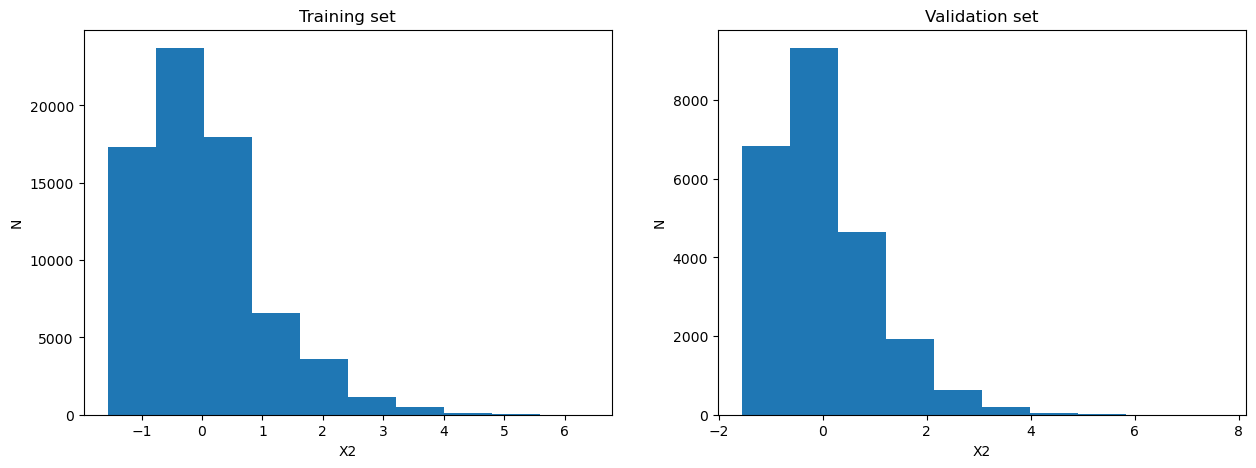

In [16]:
# Set temperature as the target variable
var = ['Temperature (C)']

# Drop temperature out of the weather data, and set it as X
X = weather_mined.loc[:, weather_mined.columns.drop(var)]
print(X.columns)

# Set the target (Y) to be temperature
Y = weather_mined[var].copy()
print(Y.columns)

X_tr_Norm, X_va_Norm, Y_tr, Y_va = split_data(X,Y)

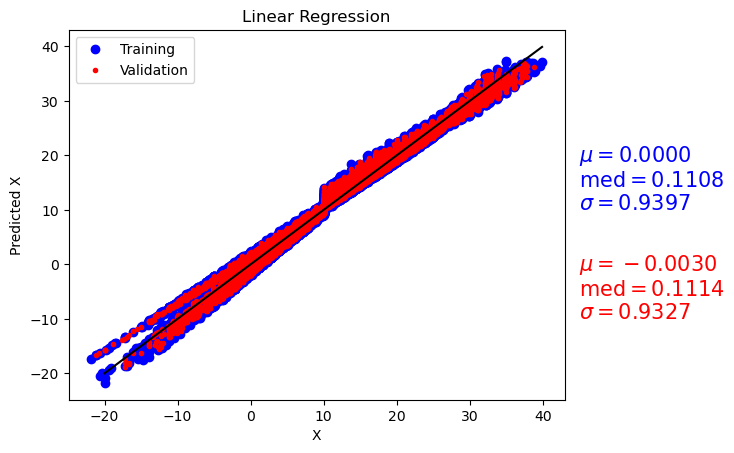

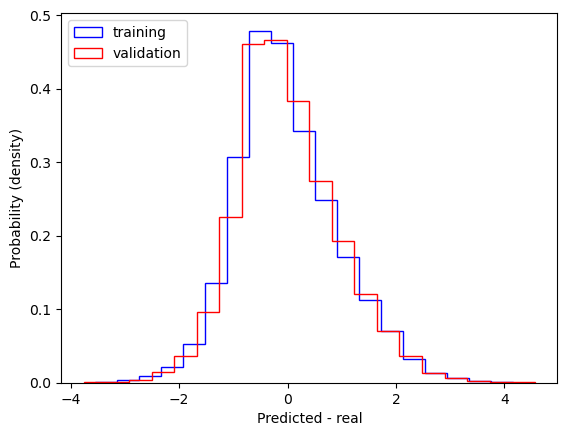

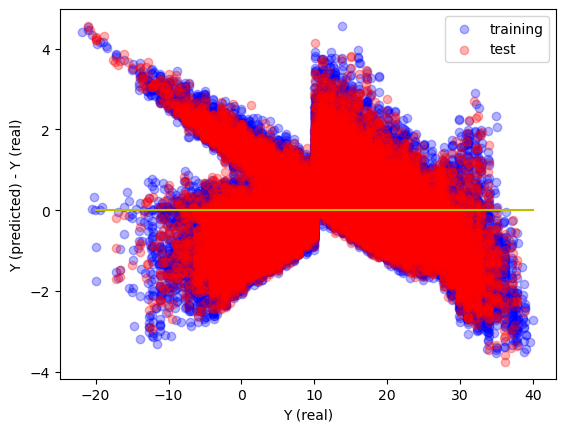

In [17]:
mu, median, sigma, muv, medianv, sigmav = linear_regression(2000, 0.001, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -20, 40, 45, 10, 45, -10, plot=1)

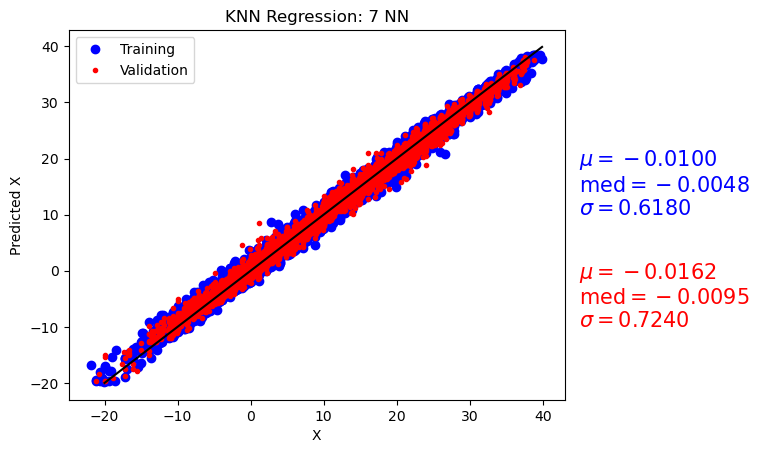

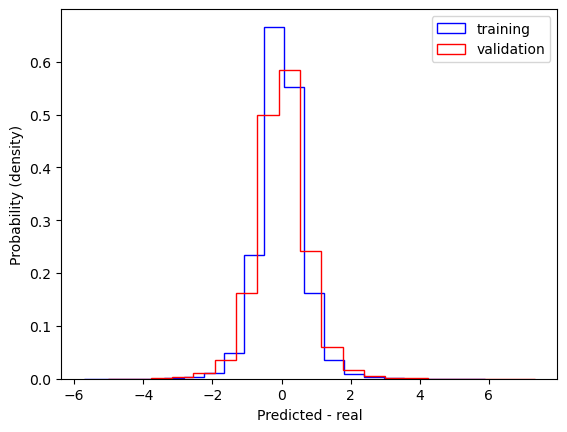

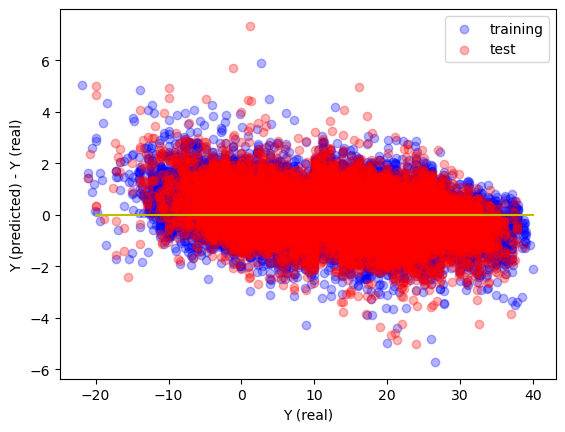

In [18]:
mu, median, sigma, muv, medianv, sigmav = nearest_neighbour(7, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -20, 40, 45, 10, 45, -10, plot=1)

## Beans

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation',
       'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
       'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')
Index(['Perimeter'], dtype='object')
training set ==  (10208, 15) (10208,) ,, validation set ==  (3403, 15) (3403,)


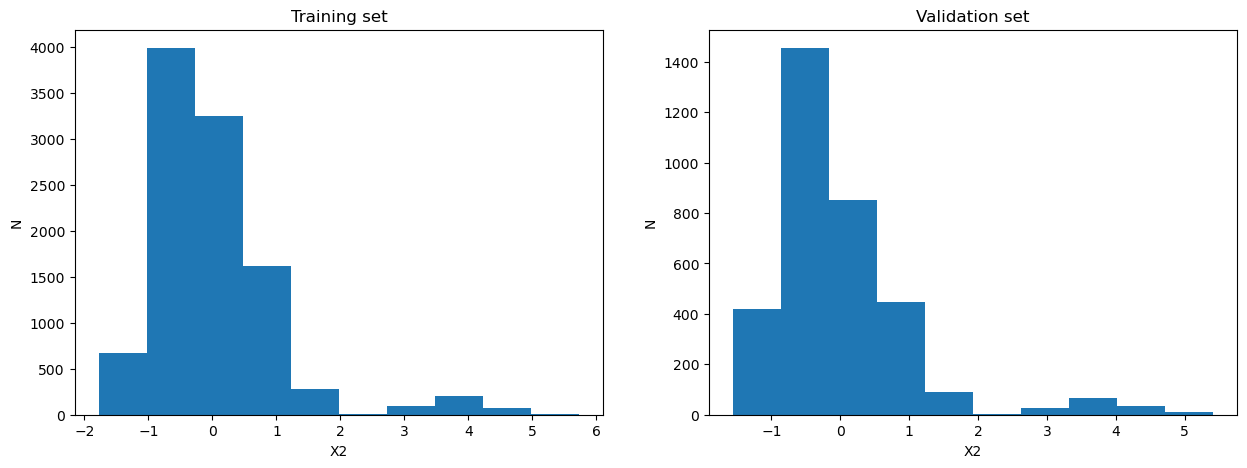

In [19]:
beans = pd.read_excel(r'Dry_Bean_Dataset.xlsx')
beans = beans.drop(['Class'], axis=1)

# Set temperature as the target variable
var = ['Perimeter']

# Drop temperature out of the weather data, and set it as X
X = beans.loc[:, beans.columns.drop(var)]
print(X.columns)

# Set the target (Y) to be temperature
Y = beans[var].copy()
print(Y.columns)

X_tr_Norm, X_va_Norm, Y_tr, Y_va = split_data(X,Y)

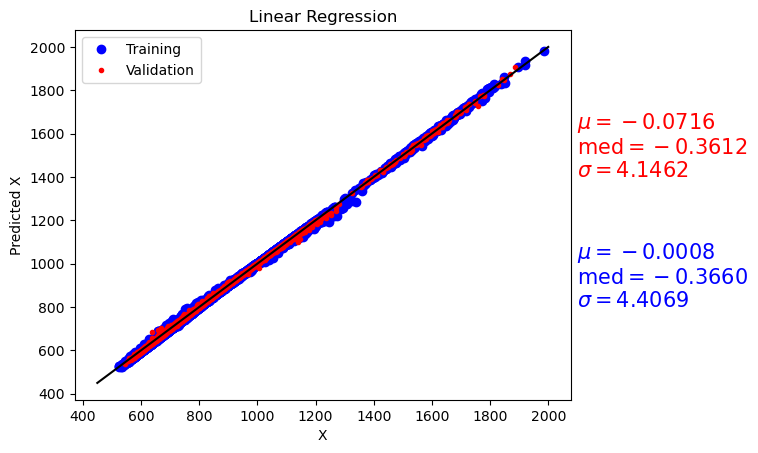

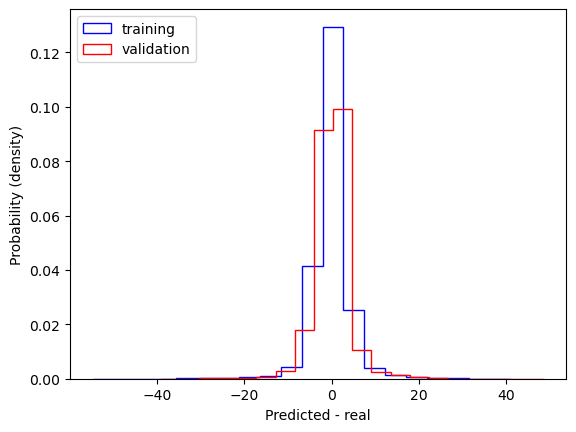

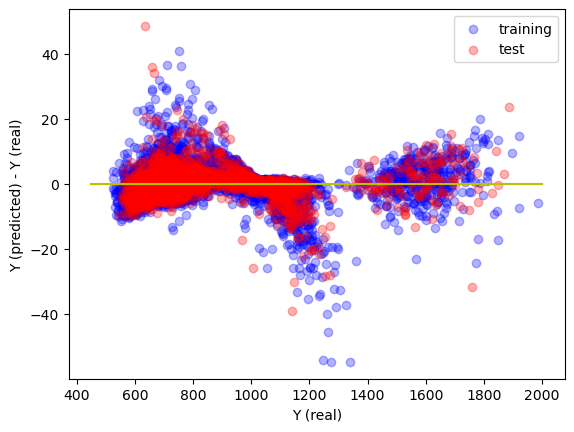

In [20]:
mu, median, sigma, muv, medianv, sigmav = linear_regression(2000, 0.001, X_tr_Norm, X_va_Norm, Y_tr, Y_va, 450, 2000, 2100, 800, 2100, 1400, plot=1)

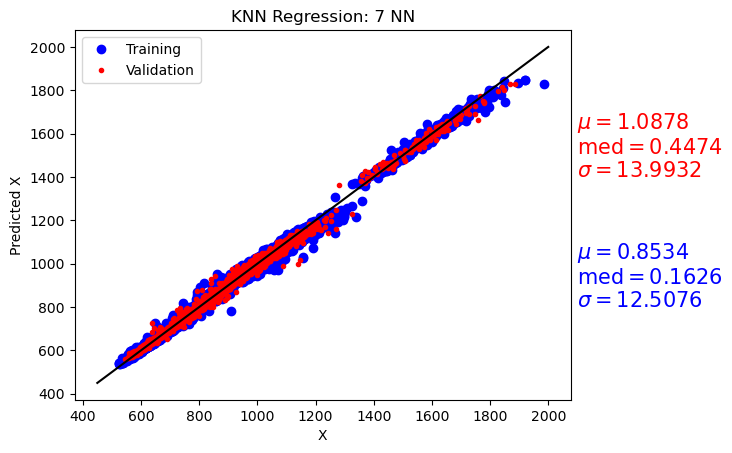

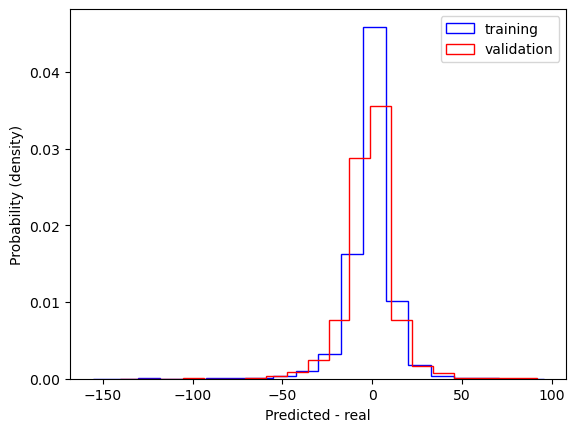

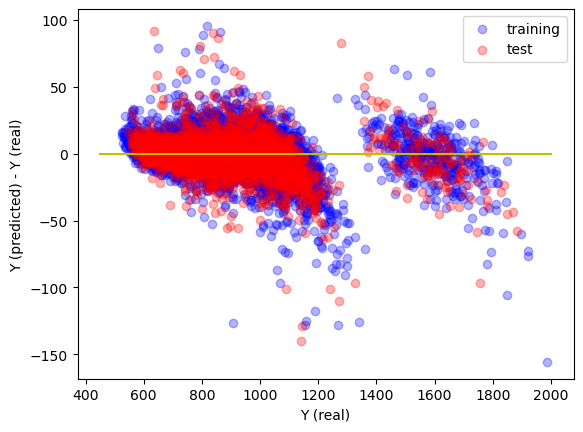

In [21]:
mu, median, sigma, muv, medianv, sigmav = nearest_neighbour(7, X_tr_Norm, X_va_Norm, Y_tr, Y_va, 450, 2000, 2100, 800, 2100, 1400, plot=1)